<a href="https://colab.research.google.com/github/gzguevara/amex_kaggle/blob/master/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook contains all my ideas for feature engineering which I aplied during the competion. It is a little bit messy :)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import

In [ ]:
import pandas as pd
import numpy  as np 

import sys

import matplotlib.pyplot as plt, gc, os
import plotly.express as px
import seaborn as sns

import random
import itertools


# Paths
targets_dir = '/content/drive/MyDrive/KaggleAMEX/Data/train_labels.csv'
train_dir   = '/content/drive/MyDrive/KaggleAMEX/Data/train/train.parquet'
test_dir    = '/content/drive/MyDrive/KaggleAMEX/Data/test/test.parquet'
sample_dir  = '/content/drive/MyDrive/KaggleAMEX/Data/sample_submission.csv'
model_dir   = '/content/drive/MyDrive/KaggleAMEX/Models'
impor_dir   = '/content/drive/MyDrive/KaggleAMEX/Importance'
results_dir = '/content/drive/MyDrive/KaggleAMEX/Results'

#Parameters
SEED, NAN_VALUE = 42, -1

#Get numerical and catecorical columns 
cat_features = ['B_30', 'B_38', 'D_117', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'B_33', 'D_92', 'D_103', 'R_27', 'D_114', 'D_116', 'D_129', 'D_139', 'D_140', 'D_143', 'B_8', 'D_51', 'D_54', 'D_65', 'B_16', 'B_22', 'D_72', 'D_78', 'D_79', 'R_9', 'D_82', 'D_107', 'D_122', 'D_125']
bin_features = ['R_2', 'S_6', 'R_4', 'R_15', 'S_18', 'D_86', 'D_87', 'B_31', 'R_19', 'B_32', 'S_20', 'R_21', 'R_22', 'R_23', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'D_127', 'R_28', 'D_109', 'D_120', 'D_135', 'D_137', 'R_7', 'R_12', 'R_14', 'D_112']
num_features = ['P_2', 'D_39', 'B_1', 'B_2', 'R_1', 'S_3', 'D_41', 'B_3', 'D_42', 'D_43', 'D_44', 'B_4', 'D_45', 'B_5', 'D_46', 'D_47', 'D_48', 'D_49', 'B_6', 'B_7', 'D_50', 'B_9', 'R_3', 'D_52', 'P_3', 'B_10', 'D_53', 'S_5', 'B_11', 'S_7', 'B_12', 'S_8', 'D_55', 'D_56', 'B_13', 'R_5', 'D_58', 'S_9', 'B_14', 'D_59', 'D_60', 'D_61', 'B_15', 'S_11', 'D_62', 'B_17', 'B_18', 'B_19', 'B_20', 'S_12', 'R_6', 'S_13', 'B_21', 'D_69', 'D_70', 'D_71', 'S_15', 'B_23', 'D_73', 'P_4', 'D_74', 'D_75', 'D_76', 'B_24', 'D_77', 'B_25', 'B_26', 'R_8', 'S_16', 'D_80', 'R_10', 'R_11', 'B_27', 'D_81', 'S_17', 'B_28', 'R_13', 'D_83', 'D_84', 'R_16', 'B_29', 'R_17', 'R_18', 'D_88', 'S_19', 'R_20', 'D_89', 'D_91', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'D_102', 'D_104', 'D_105', 'D_106', 'B_36', 'B_37', 'R_26', 'D_108', 'D_110', 'D_111', 'B_39', 'B_40', 'S_27', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_123', 'D_124', 'D_128', 'B_41', 'B_42', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_136', 'D_138', 'D_141', 'D_142', 'D_144', 'D_145']

# Read Data

In [ ]:
def read_file(path, with_na = False, no_corr = False):

    if path in [train_dir, test_dir]:
    
        print('Reading data...')
        
        # Distinguish for special columns if needed
        if no_corr: df = pd.read_parquet(path, columns = ['customer_ID', 'S_2'] + num_features + cat_features)
        else:       df = pd.read_parquet(path)

        # fill missing data
        if not with_na: df.fillna(NAN_VALUE, inplace = True)       
        
        print(f'shape of data: {df.shape}')
        print(f'NA values: {df.isna().sum().sum()}')
        print(f'Using {df.memory_usage().sum() * 1e-9} gb.')
        
        return df

# Load

In [ ]:
train = read_file(train_dir, with_na = True, no_corr = False)

Reading data...
shape of data: (5531451, 190)
NA values: 121048289
Using 2.8874175500000003 gb.


In [ ]:
testt = read_file(test_dir, with_na = True, no_corr = False)

Reading data...
shape of data: (11363762, 190)
NA values: 241385740
Using 5.931883892 gb.


In [ ]:
targets = pd.read_csv(targets_dir, usecols = ['target']).astype('int8')

In [ ]:
frequency.to_csv('/content/drive/MyDrive/KaggleAMEX/Data/test/frequency.csv')

In [ ]:
frequency = pd.read_csv('/content/drive/MyDrive/KaggleAMEX/Data/train/frequency.csv', index_col=0)

In [ ]:
non_lin = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/nonlinear.parquet')

In [ ]:
features_fin = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet')

# New State Changes

In [ ]:
test = testt[cat_features + bin_features]

In [ ]:
test = (test.diff(1) != 0).astype('int8')

In [ ]:
test['customer_ID'] = testt.customer_ID

In [ ]:
test['row'] = list(range(0,11363762))

In [ ]:
rows = test[['customer_ID',	'row']].groupby('customer_ID').agg('first')

In [ ]:
test = test.drop(rows.row)

In [ ]:
test = test.groupby('customer_ID').agg('sum')

In [ ]:
test = pd.concat([test,pd.DataFrame(index=list(range(0, 924620)))], axis=1)

In [ ]:
test.drop('row', axis=1, inplace=True)

In [ ]:
test = test.astype('float32')

In [ ]:
test.columns = [x + '_state_change' for x in test.columns]

# Read big table

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         53           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         97           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        619           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        121           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1188           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14473           False  
house-pr

In [ ]:
!kaggle competitions download -c amex-default-prediction 

100% 20.5G/20.5G [06:00<00:00, 95.0MB/s]
100% 20.5G/20.5G [06:00<00:00, 61.1MB/s]


In [ ]:
import zipfile

path_to_zip_file        = '/content/amex-default-prediction.zip'
directory_to_extract_to = '/content'

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [ ]:
columns = pd.read_csv('/content/test_data.csv', index_col=False, nrows=0).columns.tolist()

In [ ]:
import pandas as pd

dir = '/content/train_data.csv'

final = pd.DataFrame()

for skiprows, nrows in list(zip([1] + [x*100000 for x in range(1, 56)], [100000] * 55 + [31451])):

    temp = pd.read_csv(dir, skiprows=skiprows, nrows=nrows, index_col=False, header=None)

    temp = temp.isna().astype('int8')

    final = pd.concat([final,temp], axis=0)

    print(skiprows)

1
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000


In [ ]:
final.columns = columns

In [ ]:
final

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31446,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
31447,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
31448,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
31449,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0


In [ ]:
final.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/is_na_bin.parquet')

# Advanced

In [ ]:
high = ['P_2', 'P_3', 'P_4', 
        'D_48', 'D_42', 'D_44', 'D_61',
        'R_1', 'R_3', 'R_10', 'R_5', 'R_16',
        'S_3', 'S_7', 'S_15', 'S_22', 'S_8',
        'B_7', 'B_23', 'B_9', 'B_10', 'B_2']

all = []

for i in range(len(high) -1):

  all.extend(list(itertools.product([high[i]], high[i+1:])))

In [ ]:
all_features = pd.DataFrame()

for pair in all:

  # basic aggs
  group_a = train[['customer_ID', pair[0]]].groupby('customer_ID').agg(['last', 'first', 'median', 'mean', 'std', 'max', 'min'])
  group_b = train[['customer_ID', pair[1]]].groupby('customer_ID').agg(['last', 'first', 'median', 'mean', 'std', 'max', 'min'])
  group_a.columns = [x[1] + '_' for x in group_a.columns]
  group_b.columns = [x[1] + '_' for x in group_b.columns]

  # combinations
  new_features = pd.DataFrame()

  new_features[f'{pair[0]}_last_t_{pair[1]}_std']  = group_a.last_ * group_b.std_
  new_features[f'{pair[0]}_last_t_{pair[1]}_mean'] = group_a.last_ * group_b.mean_
  new_features[f'{pair[0]}_last_t_{pair[1]}_max']  = group_a.last_ * group_b.max_
  new_features[f'{pair[0]}_last_t_{pair[1]}_min']  = group_a.last_ * group_b.min_
  new_features[f'{pair[0]}_last_t_{pair[1]}_median']  = group_a.last_ * group_b.median_
  new_features[f'{pair[0]}_last_t_{pair[1]}_first']  = group_a.last_ * group_b.first_
  new_features[f'{pair[0]}_last_t_{pair[1]}_last']  = group_a.last_ * group_b.last_

  new_features[f'{pair[0]}_last_p_{pair[1]}_std']  = group_a.last_ + group_b.std_
  new_features[f'{pair[0]}_last_p_{pair[1]}_mean'] = group_a.last_ + group_b.mean_
  new_features[f'{pair[0]}_last_p_{pair[1]}_max']  = group_a.last_ + group_b.max_
  new_features[f'{pair[0]}_last_p_{pair[1]}_min']  = group_a.last_ + group_b.min_
  new_features[f'{pair[0]}_last_p_{pair[1]}_median']  = group_a.last_ + group_b.median_
  new_features[f'{pair[0]}_last_p_{pair[1]}_first']  = group_a.last_ + group_b.first_
  new_features[f'{pair[0]}_last_p_{pair[1]}_last']  = group_a.last_ + group_b.last_

  new_features[f'{pair[0]}_last_m_{pair[1]}_std']  = group_a.last_ - group_b.std_
  new_features[f'{pair[0]}_last_m_{pair[1]}_mean'] = group_a.last_ - group_b.mean_
  new_features[f'{pair[0]}_last_m_{pair[1]}_max']  = group_a.last_ - group_b.max_
  new_features[f'{pair[0]}_last_m_{pair[1]}_min']  = group_a.last_ - group_b.min_
  new_features[f'{pair[0]}_last_m_{pair[1]}_min']  = group_a.last_ - group_b.median_
  new_features[f'{pair[0]}_last_m_{pair[1]}_first']  = group_a.last_ - group_b.first_
  new_features[f'{pair[0]}_last_m_{pair[1]}_last']  = group_a.last_ - group_b.last_

  new_features[f'{pair[0]}_last_d_{pair[1]}_std']  = group_a.last_ / group_b.std_
  new_features[f'{pair[0]}_last_d_{pair[1]}_mean'] = group_a.last_ / group_b.mean_
  new_features[f'{pair[0]}_last_d_{pair[1]}_max']  = group_a.last_ / group_b.max_
  new_features[f'{pair[0]}_last_d_{pair[1]}_min']  = group_a.last_ / group_b.min_
  new_features[f'{pair[0]}_last_d_{pair[1]}_median']  = group_a.last_ / group_b.median_
  new_features[f'{pair[0]}_last_d_{pair[1]}_first']  = group_a.last_ / group_b.first_
  new_features[f'{pair[0]}_last_d_{pair[1]}_last']  = group_a.last_ / group_b.last_



  new_features[f'{pair[0]}_mean_t_{pair[1]}_std']  = group_a.mean_ * group_b.std_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_mean'] = group_a.mean_ * group_b.mean_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_max']  = group_a.mean_ * group_b.max_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_min']  = group_a.mean_ * group_b.min_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_median']  = group_a.mean_ * group_b.median_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_first']  = group_a.mean_ * group_b.first_
  new_features[f'{pair[0]}_mean_t_{pair[1]}_last']  = group_a.mean_ * group_b.last_

  new_features[f'{pair[0]}_mean_p_{pair[1]}_std']  = group_a.mean_ + group_b.std_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_mean'] = group_a.mean_ + group_b.mean_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_max']  = group_a.mean_ + group_b.max_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_min']  = group_a.mean_ + group_b.min_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_median']  = group_a.mean_ + group_b.median_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_first']  = group_a.mean_ + group_b.first_
  new_features[f'{pair[0]}_mean_p_{pair[1]}_last']  = group_a.mean_ + group_b.last_

  new_features[f'{pair[0]}_mean_m_{pair[1]}_std']  = group_a.mean_ - group_b.std_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_mean'] = group_a.mean_ - group_b.mean_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_max']  = group_a.mean_ - group_b.max_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_min']  = group_a.mean_ - group_b.min_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_min']  = group_a.mean_ - group_b.median_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_first']  = group_a.mean_ - group_b.first_
  new_features[f'{pair[0]}_mean_m_{pair[1]}_last']  = group_a.mean_ - group_b.last_

  new_features[f'{pair[0]}_mean_d_{pair[1]}_std']  = group_a.mean_ / group_b.std_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_mean'] = group_a.mean_ / group_b.mean_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_max']  = group_a.mean_ / group_b.max_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_min']  = group_a.mean_ / group_b.min_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_median']  = group_a.mean_ / group_b.median_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_first']  = group_a.mean_ / group_b.first_
  new_features[f'{pair[0]}_mean_d_{pair[1]}_last']  = group_a.mean_ / group_b.last_




  new_features = new_features.fillna(0)
  new_features.replace([np.inf, -np.inf], 0, inplace=True)

  new_features['target'] = targets.target

  a, b = iv_woe(new_features, 'target')

  if any(x in pair for x in ['P_2', 'P_3', 'P_3']):
    good_ones = a.loc[a.IV > 3.1].Variable.values
  else:
    good_ones = a.loc[a.IV > 2.65].Variable.values

  all_features[good_ones] = new_features[good_ones]
  print(all_features.shape)

In [ ]:
all_features['target'] = targets.target

a, b = iv_woe(all_features, 'target')

In [ ]:
a.sort_values('IV', ascending=False)[140:170]

,Variable,IV
0,P_2_last_m_D_44_std,3.123206
0,P_2_mean_m_B_9_max,3.113799
0,P_2_last_p_P_3_mean,3.111189
0,P_2_last_p_P_3_median,3.102471
0,D_48_last_p_B_9_last,3.045899
0,D_48_last_m_B_2_last,2.995060
0,R_1_mean_m_B_10_last,2.985433
0,D_48_last_m_B_2_mean,2.972859
0,D_48_last_p_R_1_max,2.966259
0,D_48_mean_p_B_9_last,2.957205


In [ ]:
all_features.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/advanced.parquet')

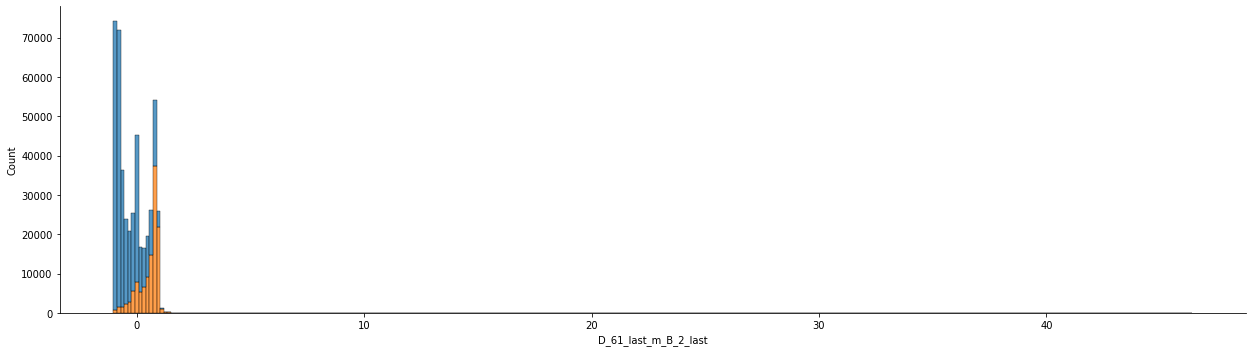

In [ ]:
sns.displot(all_features, x='D_61_last_m_B_2_last', bins=300, height=5, legend=False, hue=targets.target, multiple="stack", aspect=3.5)

#### TEST

In [ ]:
advanced = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/advanced.parquet')

In [ ]:
def get_number(string):

  number = 0

  for x in string:

    if x.isnumeric(): number += 1
  
  return number

def get_features(feature, operiation):

  a, c = feature.split(operiation)

  if get_number(a) == 1: 
    b = a[4:]
    a = a[:3]
  else: 
    b = a[5:]
    a = a[:4]
  if get_number(c) == 1: 
    d = c[4:]
    c = c[:3]
  else: 
    d = c[5:]
    c = c[:4]

  return a, b, c, d

In [ ]:
get_features('S_7_mean_t_B_7_last', '_t_')

('S_7', 'mean', 'B_7', 'last')

In [ ]:
all_vars = pd.DataFrame()

for feature in advanced.columns:

  if '_p_' in feature: 

    a, b, c, d = get_features(feature, '_p_')

    compute_a = test[['customer_ID', a]].groupby('customer_ID').agg(b)
    compute_b = test[['customer_ID', c]].groupby('customer_ID').agg(d)

    all_vars[f'{a}_{b}_p_{c}_{d}'] = compute_a[a] + compute_b[c]
  
  elif '_m_' in feature: 

    a, b, c, d = get_features(feature, '_m_')

    compute_a = test[['customer_ID', a]].groupby('customer_ID').agg(b)
    compute_b = test[['customer_ID', c]].groupby('customer_ID').agg(d)

    all_vars[f'{a}_{b}_m_{c}_{d}'] = compute_a[a] - compute_b[c]

  elif '_t_' in feature: 

    a, b, c, d = get_features(feature, '_t_')

    compute_a = test[['customer_ID', a]].groupby('customer_ID').agg(b)
    compute_b = test[['customer_ID', c]].groupby('customer_ID').agg(d)

    all_vars[f'{a}_{b}_t_{c}_{d}'] = compute_a[a] * compute_b[c]

  elif '_d_' in feature: 

    a, b, c, d = get_features(feature, '_d_')

    compute_a = test[['customer_ID', a]].groupby('customer_ID').agg(b)
    compute_b = test[['customer_ID', c]].groupby('customer_ID').agg(d)

    all_vars[f'{a}_{b}_d_{c}_{d}'] = compute_a[a] / compute_b[c]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get 

In [ ]:
all_vars = all_vars.fillna(0)
all_vars.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
any(advanced.columns[i] != all_vars.columns[i] for i in range(len(all_vars.columns)))

False

In [ ]:
all_vars.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/advanced_test.parquet')

# non linear features

In [ ]:
high = ['P_2', 'P_3', 'P_4', 
        'D_48', 'D_42', 'D_44', 'D_61',
        'R_1', 'R_3', 'R_10', 'R_5', 'R_16',
        'S_3', 'S_7', 'S_15', 'S_22', 'S_8',
        'B_7', 'B_23', 'B_9', 'B_10', 'B_2']
all = []
for i in range(len(high) -1):

  all.extend(list(itertools.product([high[i]], high[i+1:])))

In [ ]:
all_features = pd.DataFrame()

for pair in all:

  cur_test = pd.DataFrame()
  cur_test['customer_ID'] = train.customer_ID

  cur_test[f'{pair[0]}_t_{pair[1]}'] = train[pair[0]] * train[pair[1]]
  cur_test[f'{pair[0]}_d_{pair[1]}'] = train[pair[0]] / train[pair[1]]
  cur_test[f'{pair[0]}_p_{pair[1]}'] = train[pair[0]] + train[pair[1]]
  cur_test[f'{pair[0]}_m_{pair[1]}'] = train[pair[0]] - train[pair[1]]

  feature = cur_test.groupby('customer_ID').agg(['last', 'first', 'mean', 'std', 'max', 'min'])

  del cur_test

  feature.columns = ['_'.join(x) for x in feature.columns]
  feature = feature.fillna(0)
  feature.replace([np.inf, -np.inf], 0, inplace=True)
  feature = feature[feature.columns].astype('float32')
  feature['target'] = targets.target

  a, b = iv_woe(feature, 'target')

  good_ones = a.loc[a.IV > 2.5].Variable.values

  all_features[good_ones] = feature[good_ones]
  print(all_features.shape)

In [ ]:
 all_features.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/nonlinear.parquet')

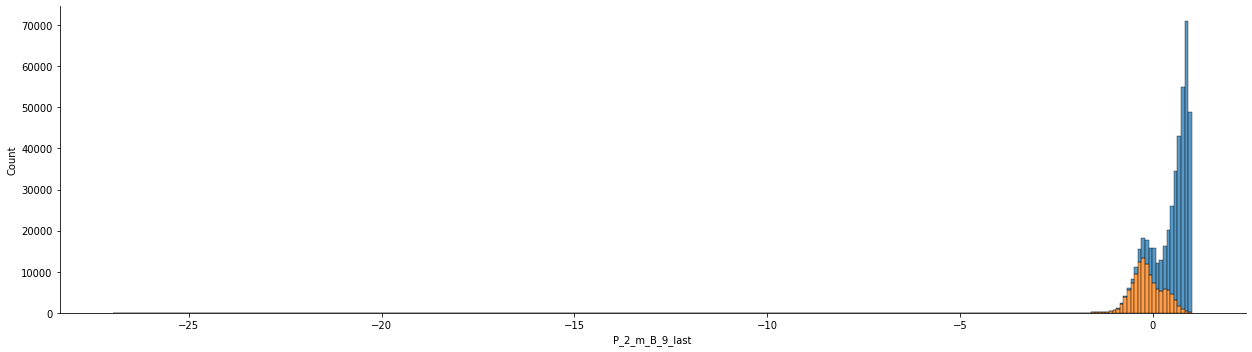

In [ ]:
sns.displot(all_features, x='P_2_m_B_9_last', bins=300, height=5, legend=False, hue=targets.target, multiple="stack", aspect=3.5)

#### TEST

In [ ]:
def get_number(string):

  number = 0

  for x in string:

    if x.isnumeric(): number += 1
  
  return number

def get_features(feature, operiation):

  a, b = feature.split(operiation)

  if get_number(b) == 1: 
    c = b[4:]
    b = b[:3]
  else: 
    c = b[5:]
    b = b[:4]

  return a, b, c
    

In [ ]:
all_vars = pd.DataFrame()

for feature in non_lin.columns:

  compute = pd.DataFrame()

  if '_p_' in feature: 

    a, b, c = get_features(feature, '_p_')

    compute['feature']     = test[a] + test[b]
    compute['customer_ID'] = test.customer_ID

    compute = compute.groupby('customer_ID').agg(c)
    name = a + '_p_' + b + '_' + c
    all_vars[name] = compute['feature']
  
  elif '_m_' in feature: 

    a, b, c = get_features(feature, '_m_')

    compute['feature']     = test[a] - test[b]
    compute['customer_ID'] = test.customer_ID

    compute = compute.groupby('customer_ID').agg(c)
    name = a + '_m_' + b + '_' + c
    all_vars[name] = compute['feature']

  
  elif '_t_' in feature: 

    a, b, c = get_features(feature, '_t_')

    compute['feature']     = test[a] * test[b]
    compute['customer_ID'] = test.customer_ID

    compute = compute.groupby('customer_ID').agg(c)
    name = a + '_t_' + b + '_' + c
    all_vars[name] = compute['feature']

  elif '_d_' in feature: 

    a, b, c = get_features(feature, '_d_')

    compute['feature']     = test[a] / test[b]
    compute['customer_ID'] = test.customer_ID

    compute = compute.groupby('customer_ID').agg(c)
    name = a + '_d_' + b + '_' + c
    all_vars[name] = compute['feature']
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To 

In [ ]:
any(non_lin.columns[i] != all_vars.columns[i] for i in range(len(all_vars.columns)))

False

In [ ]:
all_vars.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/nonlinear_test.parquet')

# Metric om predictions

In [ ]:
oof = pd.read_csv('/content/drive/MyDrive/KaggleAMEX/oof_lgbm_roll_dart_baseline_5fold_seed42.csv')

In [ ]:
list(range(2,13))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [ ]:
ooff = oof.loc[frequency.loc[frequency.frequency.isin(list(range(2,13)))].index.values]
amex_metric_mod(ooff.target, ooff.prediction)

0.6751512651472191

In [ ]:
for freq in [1,2,3,4,5,6,7,8,9,10,11,12,13]:

  cus_id = frequency.loc[frequency.frequency.isin([freq])].index.values

  ooff = oof.loc[frequency.loc[frequency.frequency.isin([freq])].index.values]


  print(freq, targets.loc[cus_id].mean().values, amex_metric_mod(ooff.target, ooff.oof))

1 [0.33574219] 0.6224178390238886
2 [0.31846507] 0.6149506167169226
3 [0.35860159] 0.6486013903969252
4 [0.41622084] 0.6008337845976459
5 [0.39263541] 0.645374941250245
6 [0.38766999] 0.6558338346023188
7 [0.41843017] 0.6610790093226088
8 [0.44729951] 0.6555779788740309
9 [0.45016378] 0.6756746572492287
10 [0.4622824] 0.6715180803992409
11 [0.44673712] 0.6775517651540877
12 [0.38934388] 0.7152714246688949
13 [0.23178787] 0.8178479784019101


In [ ]:
def amex_metric_mod(y_true, y_pred):

    labels     = np.transpose(np.array([y_true, y_pred]))
    labels     = labels[labels[:, 1].argsort()[::-1]]
    weights    = np.where(labels[:,0]==0, 20, 1)
    cut_vals   = labels[np.cumsum(weights) <= int(0.04 * np.sum(weights))]
    top_four   = np.sum(cut_vals[:,0]) / np.sum(labels[:,0])

    gini = [0,0]
    for i in [1,0]:
        labels         = np.transpose(np.array([y_true, y_pred]))
        labels         = labels[labels[:, i].argsort()[::-1]]
        weight         = np.where(labels[:,0]==0, 20, 1)
        weight_random  = np.cumsum(weight / np.sum(weight))
        total_pos      = np.sum(labels[:, 0] *  weight)
        cum_pos_found  = np.cumsum(labels[:, 0] * weight)
        lorentz        = cum_pos_found / total_pos
        gini[i]        = np.sum((lorentz - weight_random) * weight)


    return 0.5 * (gini[1]/gini[0] + top_four)

# woe_sum_num features

In [ ]:
data = features_fin[[x+'_last' for x in num_features]]

a,b=data_vars(data, targets.target )

for feature in a.VAR_NAME.unique():

  map = []

  for index, row in a.loc[a.VAR_NAME == feature].iterrows():

    current = ([row.MIN_VALUE,	row.MAX_VALUE], row.WOE)
    map.append(current)

  train[feature[:-5]] = train[feature[:-5]].apply(lambda x: next((v for m,v in map if m[0]<=x<=m[1]),0))

  test = train[['customer_ID'] + num_features].groupby('customer_ID').agg('mean')

  test = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/test_new_feature.parquet')

# Explore Variables

D_* = Delinquency variables - 96 <br>
S_* = Spend variables       - 22 <br>
P_* = Payment variables     - 3 <br>
B_* = Balance variables     - 40 <br>
R_* = Risk variables        - 28 <br>

### P_

In [ ]:
len([feature for feature in train.columns if 'R_' in feature])

28

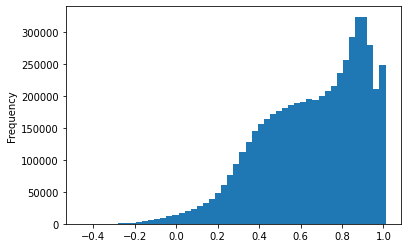

In [ ]:
train.P_2.plot(kind='hist', bins =50)

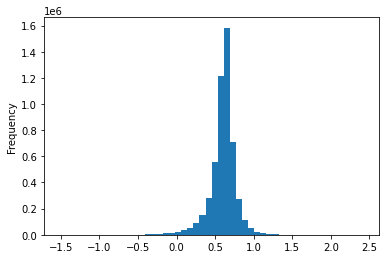

In [ ]:
train.P_3.plot(kind='hist', bins =50)

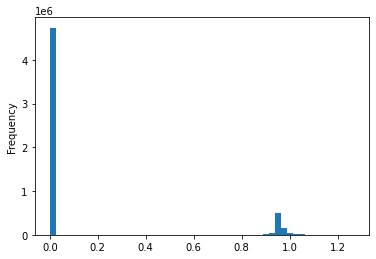

In [ ]:
train.P_4.plot(kind='hist', bins =50)

1

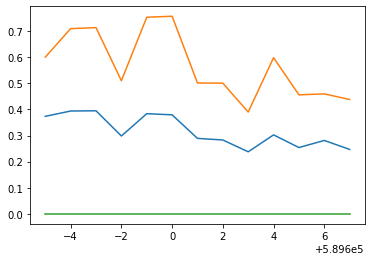

In [ ]:
cus = 48889
train.loc[train.customer_ID	 == cus].P_2.plot()
train.loc[train.customer_ID	 == cus].P_3.plot()
train.loc[train.customer_ID	 == cus].P_4.plot()
targets.target[cus]

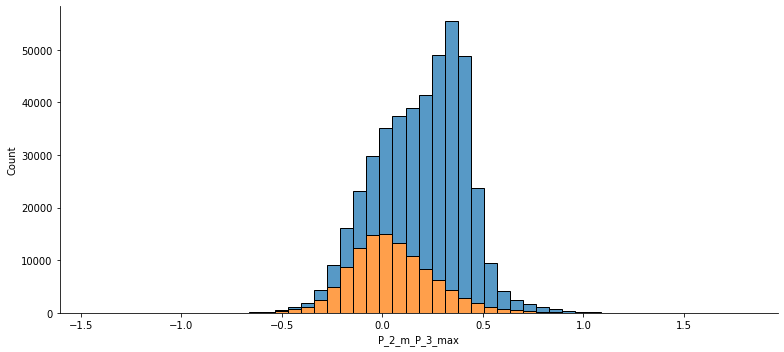

In [ ]:
sns.displot(new, x='P_2_m_P_3_max', bins=50, height=5, legend=False, hue=targets.target, multiple="stack", aspect=2.2)

In [ ]:
new.head(4) #.R_9_last.value_counts(dropna=False)

,P_3_P_2,P_3_P_4,P_4_P_2,P_2_m_P_3_mean,P_2_m_P_3_std,P_2_m_P_3_min,P_2_m_P_3_max,P_2_m_P_3_first,P_2_m_P_3_last,P_2_m_P_4_mean,...,P_2_sq_P_4_min,P_2_sq_P_4_max,P_2_sq_P_4_first,P_2_sq_P_4_last,P_3_sq_P_4_mean,P_3_sq_P_4_std,P_3_sq_P_4_min,P_3_sq_P_4_max,P_3_sq_P_4_first,P_3_sq_P_4_last
0,0.442552,NaN,NaN,0.253686,0.045473,0.178694,0.328134,0.202006,0.305353,0.933824,...,0.754431,0.922337,0.880723,0.873748,0.464958,0.067683,0.338349,0.550286,0.542377,0.396135
1,0.891242,NaN,NaN,0.333155,0.019882,0.308979,0.363370,0.310110,0.309621,0.899820,...,0.741509,0.863268,0.863268,0.775314,0.322364,0.041456,0.260245,0.383175,0.383175,0.325925
2,0.946598,NaN,NaN,0.260263,0.049129,0.220741,0.416548,0.241893,0.251936,0.878454,...,0.636278,0.818088,0.768455,0.775940,0.387436,0.079545,0.145254,0.460642,0.402873,0.395564
3,0.055986,NaN,NaN,-0.011965,0.091201,-0.089787,0.277656,-0.015211,-0.050304,0.598969,...,0.321990,0.388617,0.321990,0.386606,0.380732,0.094955,0.119094,0.495917,0.339484,0.451692


substract P_3 from P_2. <br> 
compute usual metrics. <br>
corr and cov. <br>

In [ ]:
corr = train[['customer_ID', 'P_2', 'P_3', 'P_4']].groupby('customer_ID').agg('corr')

In [ ]:
corr

P_2       P_3  P_4
customer_ID                             
0           P_2  1.000000  0.442552  NaN
            P_3  0.442552  1.000000  NaN
            P_4       NaN       NaN  NaN
1           P_2  1.000000  0.891242  NaN
            P_3  0.891242  1.000000  NaN
...                   ...       ...  ...
458911      P_3  0.505275  1.000000  NaN
            P_4       NaN       NaN  NaN
458912      P_2  1.000000  0.822293  NaN
            P_3  0.822293  1.000000  NaN
            P_4       NaN       NaN  NaN

[1376739 rows x 3 columns]

In [ ]:
new = pd.DataFrame(columns=['P_3_P_2', 'P_3_P_4', 'P_4_P_2'])


In [ ]:
index = [feat[1] == 'P_3' for feat in corr.index.values]
index2 = [feat[1] == 'P_4' for feat in corr.index.values]

In [ ]:
new['P_3_P_2'] = corr.loc[index, 'P_2'].values
new['P_3_P_4'] = corr.loc[index, 'P_4'].values
new['P_4_P_2'] = corr.loc[index2, 'P_2'].values

In [ ]:
new.columns = [feature + '_corr' for feature in new.columns]

In [ ]:
new2 = pd.DataFrame()

In [ ]:
new2['P_2_m_P_3'] = train['P_2'] - train['P_3']
new2['P_2_m_P_4'] = train['P_2'] - train['P_4']
new2['P_3_m_P_4'] = train['P_3'] - train['P_4']

new2['P_2_p_P_3'] = train['P_2'] - train['P_3']
new2['P_2_p_P_4'] = train['P_2'] - train['P_4']
new2['P_3_p_P_4'] = train['P_3'] - train['P_4']

new2['P_2_t_P_3'] = train['P_2'] * train['P_3']
new2['P_2_t_P_4'] = train['P_2'] * train['P_4']
new2['P_3_t_P_4'] = train['P_3'] * train['P_4']

new2['P_2_d_P_3'] = train['P_2'] / train['P_3']
new2['P_2_d_P_4'] = train['P_2'] / train['P_4']
new2['P_3_d_P_4'] = train['P_3'] / train['P_4']

In [ ]:
new2['customer_ID'] = train['customer_ID']

In [ ]:
new2 = new2.groupby("customer_ID").agg(['mean', 'std', 'min', 'max', 'first', 'last'])

In [ ]:
new2.columns = ['_'.join(x) for x in new2.columns]

In [ ]:
new = pd.concat([new, new2], axis=1)

In [ ]:
new.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/payment_variables.parquet')

### S_

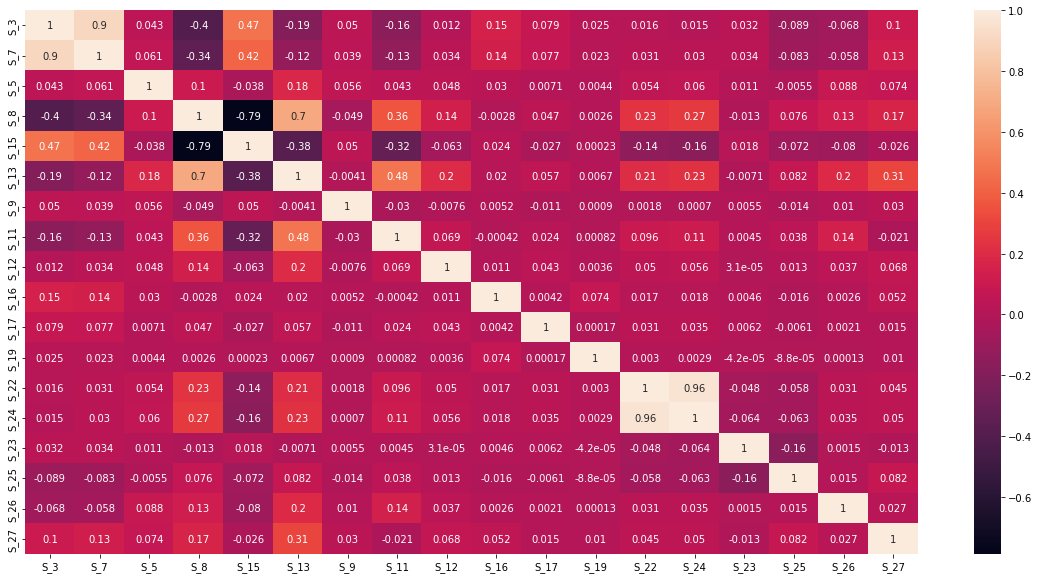

In [ ]:
s_features = train[[feature for feature in num_features if 'S_' in feature]]
corr_train = s_features.corr()
clusters   = perform_clustering(corr_train, limit = 0.5)
clusters  = [inner for outer in clusters for inner in outer]
#members    = elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
signi.loc[[x for x in signi.index.values if 'S_' in x], 'avg'].sort_values()

S_13_last    0.000814
S_9_last     0.000966
S_11_last    0.001622
S_27_last    0.002581
S_25_last    0.003114
S_17_last    0.003535
S_23_last    0.003902
S_12_last    0.003972
S_15_last    0.004212
S_16_last    0.004375
S_5_last     0.004627
S_7_last     0.005138
S_19_last    0.005335
S_26_last    0.005351
S_22_last    0.006208
S_8_last     0.006256
S_24_last    0.010117
S_3_last     0.010237
Name: avg, dtype: float64

In [ ]:
aggs = pd.DataFrame()
aggs['customer_ID'] = train.customer_ID

aggs['S_3_p_S_24'] = train['S_3'] + train['S_24']

aggs['S_3_m_S_24'] = train['S_3'] - train['S_24']

aggs['S_3_t_S_24'] = train['S_3'] * train['S_24']

aggs['S_3_d_S_24'] = train['S_3'] / train['S_24']

aggs = aggs.groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggs.columns = ['_'.join(x) for x in aggs.columns]

In [ ]:
curr = train[['customer_ID', 'S_3', 'S_24']].groupby('customer_ID').agg('corr')

In [ ]:
curr = curr.unstack()

In [ ]:
curr = curr[[('S_3', 'S_24')]]

In [ ]:
curr.columns = ['S_3_S_24_corr']
aggs['S_3_S_24_corr'] = curr['S_3_S_24_corr']

calculate time from last billing

In [ ]:
test = train[['S_2']].diff(1)

In [ ]:
test['customer_ID'] = train.customer_ID

In [ ]:
test = test.groupby('customer_ID').agg('last')

In [ ]:
test['S_2'] = test.S_2.apply(lambda x: x.days)

In [ ]:
aggs['S_2_last_before'] = test['S_2']

binary sum 

In [ ]:
# Sum bin
s_bin = [x for x in bin_features if 'S_' in x]
test = train[s_bin + ['customer_ID']]
for bin in s_bin:

  a = targets.loc[train.loc[train[bin] == 0, 'customer_ID'].values].mean().values[0]
  b = targets.loc[train.loc[train[bin] == 1, 'customer_ID'].values].mean().values[0]
  
  test.loc[test[bin] == 0, bin] = a
  test.loc[test[bin] == 1, bin] = b

test1 = test.groupby('customer_ID').agg('mean')
test1.columns = [x+'_bin_mean_sum' for x in test1.columns] 
aggs['bin_sum'] = test1.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


save

In [ ]:
aggs['target'] = targets.target
newDF, woeDF = iv_woe(aggs, 'target', bins=8, show_woe=False)

In [ ]:
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/spend_variables.parquet')

### R_

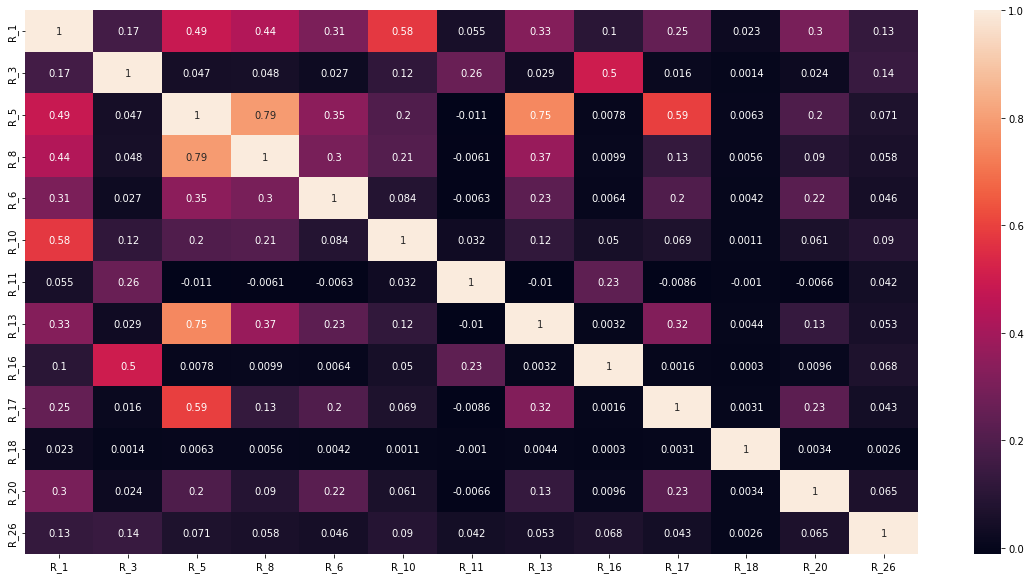

In [ ]:
s_features = train[[feature for feature in num_features if 'R_' in feature]]
corr_train = s_features.corr()
clusters   = perform_clustering(corr_train, limit = 0.7)
clusters  = [inner for outer in clusters for inner in outer]
#members    = elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
signi.loc[[x for x in signi.index.values if 'R_' in x], 'avg'].sort_values()

R_17_last    0.000000e+00
R_18_last    0.000000e+00
R_13_last    4.413195e-08
R_20_last    3.040982e-05
R_10_last    4.515279e-05
R_8_last     6.734053e-05
R_9_last     5.275581e-04
R_5_last     1.041442e-03
R_16_last    1.573998e-03
R_11_last    2.209786e-03
R_6_last     3.952207e-03
R_3_last     9.637716e-03
R_1_last     1.815504e-02
Name: avg, dtype: float64

In [ ]:
train['R_sum_num'] = train[['R_3', 'R_17', 'R_18', 'R_13', 'R_20', 'R_10', 'R_8', 'R_9', 'R_5', 'R_16', 'R_11']].sum(axis=1)

In [ ]:
aggs = train[['customer_ID', 'R_sum_num']].groupby('customer_ID').agg('mean')

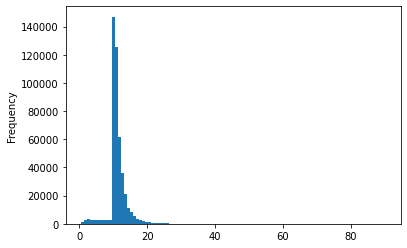

In [ ]:
aggs.R_sum_num.plot(kind='hist', bins=100)

Binary

In [ ]:
r_bin = [x for x in bin_features if 'R_' in x]

In [ ]:
bin_sum = train[['customer_ID'] + r_bin].groupby('customer_ID').agg('mean')

In [ ]:
aggs['R_bin_sum'] = bin_sum.sum(axis=1)

Save

In [ ]:
aggs['target'] = targets.target
newDF, woeDF = iv_woe(aggs, 'target', bins=8, show_woe=False)
aggs.drop('target', axis=1, inplace=True)

R_sum_num
Information value of R_sum_num is 0.724169
R_bin_sum
Information value of R_bin_sum is 1.123381


In [ ]:
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/risk_variables.parquet')

### B_

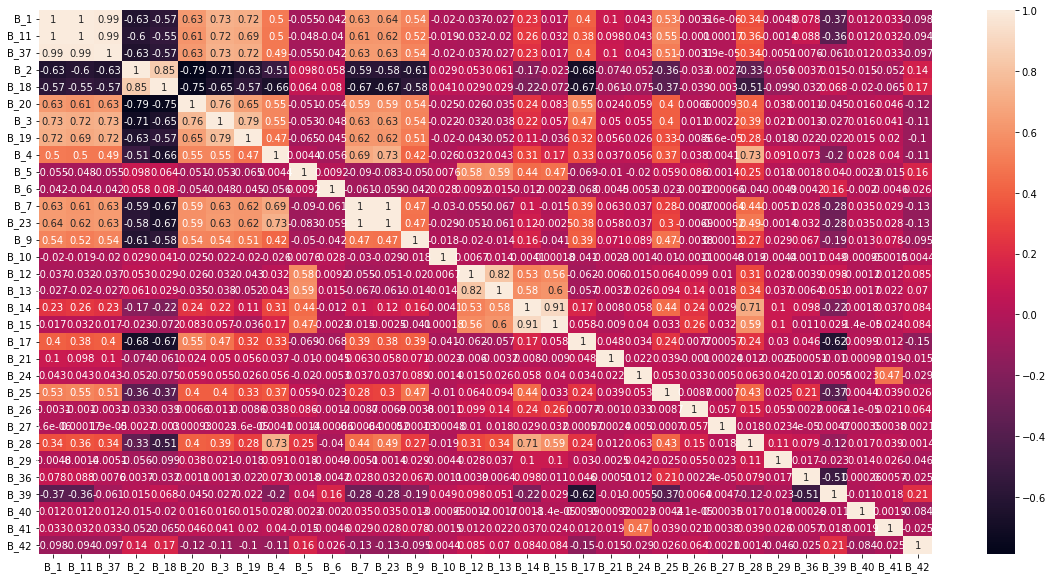

In [ ]:
b_features = train[[feature for feature in num_features if 'B_' in feature]]
corr_train = b_features.corr()

clusters   = perform_clustering(corr_train, limit = 0.75)
members    = elect_members(corr_train, clusters)

clusters   = [inner for outer in clusters for inner in outer]

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
sns.heatmap(corr_num, annot=True)

In [ ]:
signi.loc[[x for x in signi.index.values if 'B_' in x and x[:-5] in num_features], 'avg'].sort_values()

B_42_last    0.000000
B_39_last    0.000000
B_41_last    0.000000
B_29_last    0.000268
B_20_last    0.000995
B_12_last    0.002545
B_24_last    0.002677
B_21_last    0.002702
B_19_last    0.002711
B_36_last    0.003455
B_28_last    0.003503
B_6_last     0.003947
B_17_last    0.004105
B_14_last    0.004174
B_3_last     0.004365
B_25_last    0.004403
B_23_last    0.004410
B_4_last     0.004445
B_27_last    0.004616
B_18_last    0.004915
B_10_last    0.005031
B_15_last    0.005238
B_40_last    0.005717
B_13_last    0.005829
B_7_last     0.005916
B_11_last    0.006036
B_37_last    0.006373
B_26_last    0.006496
B_2_last     0.006614
B_1_last     0.006713
B_5_last     0.013505
B_9_last     0.015193
Name: avg, dtype: float64

In [ ]:
aggs = pd.DataFrame()
aggs['customer_ID'] = train.customer_ID

aggs['B_5_p_B_9'] = train['B_5'] + train['B_9']

aggs['B_5_m_B_9'] = train['B_5'] - train['B_9']

aggs['B_5_t_B_9'] = train['B_5'] * train['B_9']

aggs['B_5_d_B_9'] = train['B_5'] / train['B_9']

aggs = aggs.groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggs.columns = ['_'.join(x) for x in aggs.columns]

curr = train[['customer_ID', 'B_5', 'B_9']].groupby('customer_ID').agg('corr')

curr = curr.unstack()

curr = curr[[('B_5', 'B_9')]]

curr.columns = ['B_5_B_9_corr']
aggs['B_5_B_9_corr'] = curr['B_5_B_9_corr']

categorial

In [ ]:
# Sum cat
b_bin = [x for x in cat_features if 'B_' in x]
test = train[b_bin + ['customer_ID']]
for cat in b_bin:

    for cat_in in test[cat].unique():

        rep = targets.loc[test.loc[test[cat] == cat_in, 'customer_ID'].unique()].mean().values[0]

        test.loc[test[cat] == cat_in, cat] = rep

test = test.groupby('customer_ID').agg('mean')
test.columns = [x+'_cat_mean_sum' for x in test.columns] 
test['B_cat_sum'] = test.sum(axis=1)
aggs[test.columns.values] = test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
'B_30_cat_mean_sum' in aggs.columns

True

save

In [ ]:
aggs['target'] = targets.target
newDF, woeDF = iv_woe(aggs, 'target', bins=8, show_woe=False)
aggs.drop('target', axis=1, inplace=True)

B_5_p_B_9_mean
Information value of B_5_p_B_9_mean is 1.158901
B_5_p_B_9_std
Information value of B_5_p_B_9_std is 0.385057
B_5_p_B_9_max
Information value of B_5_p_B_9_max is 1.129978
B_5_p_B_9_min
Information value of B_5_p_B_9_min is 0.756162
B_5_p_B_9_last
Information value of B_5_p_B_9_last is 1.421601
B_5_p_B_9_first
Information value of B_5_p_B_9_first is 0.463541
B_5_m_B_9_mean
Information value of B_5_m_B_9_mean is 1.891972
B_5_m_B_9_std
Information value of B_5_m_B_9_std is 0.397708
B_5_m_B_9_max
Information value of B_5_m_B_9_max is 1.198656
B_5_m_B_9_min
Information value of B_5_m_B_9_min is 1.811289
B_5_m_B_9_last
Information value of B_5_m_B_9_last is 2.042922
B_5_m_B_9_first
Information value of B_5_m_B_9_first is 0.927819
B_5_t_B_9_mean
Information value of B_5_t_B_9_mean is 0.789553
B_5_t_B_9_std
Information value of B_5_t_B_9_std is 0.702275
B_5_t_B_9_max
Information value of B_5_t_B_9_max is 0.685938
B_5_t_B_9_min
Information value of B_5_t_B_9_min is 0.497017
B_5_t_

In [ ]:
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/balance_features.parquet')

### D_

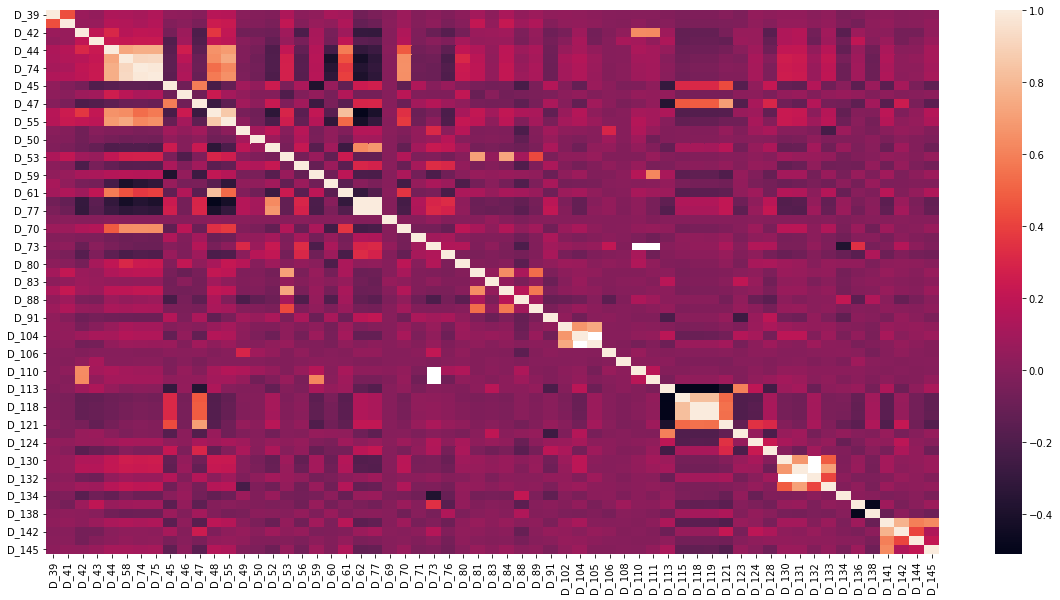

In [ ]:
'''
d_features = train[[feature for feature in num_features if 'D_' in feature]]
corr_train = d_features.corr()

clusters   = perform_clustering(corr_train, limit = 0.75)
members    = elect_members(corr_train, clusters)

clusters   = [inner for outer in clusters for inner in outer]

plt.figure(figsize=(20,10))
corr_num = train[clusters].corr()
'''
plt.figure(figsize=(20,10))
sns.heatmap(corr_num, annot=False)

In [ ]:
signi.loc[[x for x in signi.index.values if 'D_' in x and x[:-5] in num_features], 'avg'].sort_values()

D_138_last   -0.000020
D_111_last    0.000000
D_88_last     0.000000
D_108_last    0.000000
D_110_last    0.000000
D_136_last    0.000012
D_89_last     0.000017
D_83_last     0.000098
D_134_last    0.000132
D_81_last     0.000137
D_46_last     0.000199
D_84_last     0.000204
D_123_last    0.000300
D_104_last    0.000504
D_128_last    0.000507
D_113_last    0.000591
D_80_last     0.000946
D_130_last    0.001150
D_59_last     0.001231
D_131_last    0.001342
D_76_last     0.001381
D_145_last    0.001460
D_75_last     0.001826
D_124_last    0.001861
D_141_last    0.002027
D_119_last    0.002389
D_118_last    0.002413
D_58_last     0.002772
D_91_last     0.002862
D_106_last    0.002917
D_53_last     0.002996
D_69_last     0.003030
D_74_last     0.003179
D_105_last    0.003180
D_142_last    0.003214
D_56_last     0.003240
D_115_last    0.003348
D_60_last     0.003500
D_144_last    0.003527
D_70_last     0.003562
D_41_last     0.003668
D_133_last    0.004177
D_132_last    0.004207
D_121_last 

In [ ]:
aggs = pd.DataFrame()
aggs['customer_ID'] = train.customer_ID

aggs['D_42_p_D_39'] = train['D_42'] + train['D_39']
aggs['D_42_m_D_39'] = train['D_42'] - train['D_39']
aggs['D_42_t_D_39'] = train['D_42'] * train['D_39']
aggs['D_42_d_D_39'] = train['D_42'] / train['D_39']

aggs['D_62_p_D_39'] = train['D_62'] + train['D_39']
aggs['D_62_m_D_39'] = train['D_62'] - train['D_39']
aggs['D_62_t_D_39'] = train['D_62'] * train['D_39']
aggs['D_62_d_D_39'] = train['D_62'] / train['D_39']

aggs = aggs.groupby('customer_ID').agg( ['mean', 'std', 'max', 'min', 'last', 'first'])
aggs.columns = ['_'.join(x) for x in aggs.columns]

curr = train[['customer_ID', 'D_42', 'D_39']].groupby('customer_ID').agg('corr')
curr = curr.unstack()
curr = curr[[('D_42', 'D_39')]]
curr.columns = ['D_42_D_39_corr']
aggs['D_42_D_39_corr'] = curr['D_42_D_39_corr']

curr = train[['customer_ID', 'D_62', 'D_39']].groupby('customer_ID').agg('corr')
curr = curr.unstack()
curr = curr[[('D_62', 'D_39')]]
curr.columns = ['D_62_D_39_corr']
aggs['D_62_D_39_corr'] = curr['D_62_D_39_corr']

binary

In [ ]:

# Sum bin
s_bin = [x for x in bin_features if 'D_' in x]
test = train[s_bin + ['customer_ID']]
for bin in s_bin:

  a = targets.loc[train.loc[train[bin] == 0, 'customer_ID'].values].mean().values[0]
  b = targets.loc[train.loc[train[bin] == 1, 'customer_ID'].values].mean().values[0]
  
  test.loc[test[bin] == 0, bin] = a
  test.loc[test[bin] == 1, bin] = b

test1 = test.groupby('customer_ID').agg('mean')
test1.columns = [x+'_bin_mean_sum' for x in test1.columns] 
aggs['D_bin_sum'] = test1.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


categorial

In [ ]:
[x for x in cat_features if 'D_' in x]
# Sum cat
b_bin = [x for x in cat_features if 'D_' in x]
test = train[b_bin + ['customer_ID']]
for cat in b_bin:

    for cat_in in test[cat].unique():

        rep = targets.loc[test.loc[test[cat] == cat_in, 'customer_ID'].unique()].mean().values[0]

        test.loc[test[cat] == cat_in, cat] = rep

test = test.groupby('customer_ID').agg('mean')
test.columns = [x+'_cat_mean_sum' for x in test.columns] 
test['D_cat_sum'] = test.sum(axis=1)
aggs[test.columns.values] = test

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


save

In [ ]:
aggs.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/delinquency_features.parquet')

In [ ]:
aggs

,D_42_p_D_39_mean,D_42_p_D_39_std,D_42_p_D_39_max,D_42_p_D_39_min,D_42_p_D_39_last,D_42_p_D_39_first,D_42_m_D_39_mean,D_42_m_D_39_std,D_42_m_D_39_max,D_42_m_D_39_min,...,D_125_cat_mean_sum,D_cat_sum,D_bin_sum,B_30_cat_mean_sum,B_38_cat_mean_sum,B_33_cat_mean_sum,B_8_cat_mean_sum,B_16_cat_mean_sum,B_22_cat_mean_sum,B_cat_sum
customer_ID,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,5.448267,2.420081,0.245498,0.103445,0.178581,0.124678,0.160566,0.239222,1.051990
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,5.829328,2.754617,0.245498,0.103445,0.178581,0.124678,0.186086,0.239222,1.077509
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,6.145662,2.677899,0.245498,0.242123,0.178581,0.124678,0.162007,0.239222,1.192108
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,5.938538,2.774686,0.245498,0.103445,0.178581,0.385596,0.190407,0.239222,1.342749
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,5.910666,2.677899,0.245498,0.178118,0.178581,0.225031,0.160566,0.239222,1.227016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,5.986158,2.649040,0.245498,0.103445,0.178581,0.385596,0.162007,0.239222,1.314349
458909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,6.435329,2.556994,0.518456,0.495349,0.401648,0.124678,0.510552,0.506021,2.556704
458910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.255611,6.277345,2.594773,0.245498,0.229319,0.212899,0.385596,0.351784,0.239222,1.664318


# Frist/Second Difference of last

### first

In [ ]:
cus   = test.customer_ID
test = test[['S_2'] + num_features].diff(2)

In [ ]:
test.S_2 = test.S_2.apply(lambda x: x.days)

In [ ]:
test['customer_ID'] = cus

In [ ]:
diff1 = test[test.columns.to_list()[:50] + ['customer_ID']].groupby('customer_ID').agg('last')

In [ ]:
diff2 = test[test.columns.to_list()[50:]].groupby('customer_ID').agg('last')

In [ ]:
diff1 = pd.concat([diff1, diff2], axis=1)

In [ ]:
customer = frequency.loc[frequency.frequency.isin([1,2])].index.to_list()

In [ ]:
diff1.loc[customer] = np.nan

In [ ]:
diff = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/test/diffs_test.parquet')

In [ ]:
diff.columns = [x + '_diff_1' for x in diff.columns]

In [ ]:
diff1.columns = [x + '_diff_2' for x in diff1.columns]

In [ ]:
diff = pd.concat([diff, diff1], axis=1)

In [ ]:
diff.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/test/diffs_test.parquet')

In [ ]:
test2 = train[['S_2'] + num_features].diff(2)

In [ ]:
test2.S_2 = test2.S_2.apply(lambda x: x.days)

In [ ]:
test2['customer_ID'] = train.customer_ID

In [ ]:
test2 = test2.groupby('customer_ID').agg('last')

In [ ]:
test2.columns = [x+'_diff_2' for x in test2.columns]

In [ ]:
customer2 = frequency.loc[frequency.frequency.isin([1,2])].index.to_list()

In [ ]:
test2.loc[customer2] = np.nan

In [ ]:
test = pd.concat([test, test2], axis=1)

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/train/diffs.parquet')

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/first_diff.parquet')

In [ ]:
three = test[['D_65', 'D_112']].diff(1)

In [ ]:
three['customer_ID'] = test.customer_ID

In [ ]:
three = three.groupby('customer_ID').agg('last')

In [ ]:
three.columns = [ x + '_diff_1' for x in three.columns]

In [ ]:
test = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/test/first_diff_test.parquet')

In [ ]:
test[three.columns] = three[three.columns]

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/test/first_diff_test.parquet')

### Second

In [ ]:
train = train[['customer_ID', 'S_2'] + num_features]

new_index = [num - 0.5 for num in range(458913)]
to_merge = pd.DataFrame(new_index, columns=['customer_ID'])
train = pd.concat([train, to_merge], axis=0)
train.sort_values(['customer_ID', 'S_2'], inplace=True)
del to_merge

In [ ]:
train.reset_index(drop=True, inplace=True)
cus_id = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train = train.diff(2, axis=0)

In [ ]:
train['customer_ID'] = cus_id

In [ ]:
new_index = [-1] + list( reversed(train.customer_ID.values))
new_index = new_index[:-1]

In [ ]:
last = 0
good_index = []

for num in new_index:

    if last == -1:

        good_index.append(num)
    
    else:

      good_index.append(-1)

    last =  num

In [ ]:
good_index = good_index[1:]
good_index = [-1] + list(reversed(good_index))
train['good_index']= good_index

In [ ]:
train = train.loc[train.good_index != -1][['S_2'] + num_features]

In [ ]:
train.S_2 = train.S_2.apply(lambda x: x.days)
train.reset_index(drop=True, inplace=True)
train.columns = [feature + '_diff_2' for feature in train.columns]

In [ ]:
train

,S_2_diff_2,P_2_diff_2,B_31_diff_2,D_39_diff_2,B_1_diff_2,B_2_diff_2,R_1_diff_2,S_3_diff_2,D_41_diff_2,B_3_diff_2,...,D_136_diff_2,D_137_diff_2,D_138_diff_2,D_139_diff_2,D_140_diff_2,D_141_diff_2,D_142_diff_2,D_143_diff_2,D_144_diff_2,D_145_diff_2
0,61.0,0.024933,0.0,0.0,0.006553,0.002849,-0.002072,0.036139,0.0,0.003937,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.000034,0.0
1,58.0,-0.000406,0.0,-1.0,0.024102,0.001715,0.000956,0.035393,0.0,0.002266,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.003457,0.0
2,59.0,-0.018573,0.0,0.0,0.000833,-0.001170,-0.000956,NaN,0.0,0.003356,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.008582,0.0
3,70.0,0.007115,0.0,0.0,-0.012545,0.037543,-0.001819,-0.015133,0.0,0.001533,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.000767,0.0
4,59.0,-0.009417,0.0,0.0,-0.002127,0.002384,-0.007829,NaN,0.0,0.005479,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.004393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,74.0,0.006280,0.0,15.0,0.015351,0.002643,-0.003829,-0.005145,0.0,-0.001501,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,-0.005411,0.0
458909,59.0,-0.025072,0.0,0.0,-0.026833,0.010927,-0.001902,NaN,0.0,-0.022972,...,NaN,NaN,NaN,0.0,0.0,0.0000,NaN,0.0,0.003720,0.0
458910,55.0,0.005974,0.0,-4.0,-0.006538,0.005603,-0.004439,-0.009176,0.0,0.001423,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,-0.004564,NaN
458911,57.0,-0.033310,0.0,-1.0,0.000330,0.504959,-0.007012,-0.200522,0.0,-0.033643,...,NaN,NaN,NaN,0.0,0.0,0.0087,0.012448,0.0,-0.004601,0.0


In [ ]:
train.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/second_diff.parquet')

# WOE

### Algorithm

In [ ]:

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 10

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)
    
def data_vars(df1, target):

  stack = traceback.extract_stack()
  filename, lineno, function_name, code = stack[-2]
  vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
  final = (re.findall(r"[\w']+", vars_name))[-1]

  x = df1.dtypes.index
  count = -1

  for i in x:
      if i.upper() not in (final.upper()):
          if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 60:
              conv = mono_bin(target, df1[i])
              conv["VAR_NAME"] = i
              count = count + 1
          else:
              conv = char_bin(target, df1[i])
              conv["VAR_NAME"] = i            
              count = count + 1
              
          if count == 0:
              iv_df = conv
          else:
              iv_df = iv_df.append(conv,ignore_index=True)

  iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
  iv = iv.reset_index()
  return(iv_df,iv)

def iv_woe(data, target, bins=20, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:

        print(ivars)

        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>3):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
            
        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events']/d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events']-d['% of Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF


### Calculation

categorial

In [ ]:
dir      = '/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet'
features = [f'{x}_last' for x in cat_features]
cats_fet = pd.read_parquet(dir, columns=features)
cats_fet['target'] = targets.target

other

In [ ]:
# non linear numerical
dir = '/content/drive/MyDrive/KaggleAMEX/Data/nonlinear.parquet'
new = pd.read_parquet(dir)

In [ ]:
test2 = test.loc[frequency.loc[frequency.frequency == 13].index.to_list()]

In [ ]:
test2.reset_index(inplace=True, drop=True)

In [ ]:
dir = '/content/drive/MyDrive/KaggleAMEX/Data/num_woe_sum.parquet'
new = pd.read_parquet(dir)
new['target'] = targets.target

In [ ]:
a, b = iv_woe(new, 'target')

In [ ]:
a, b = data_vars(test2, targets)

NameError: ignored

In [ ]:
new = new.fillna(0)

In [ ]:
new.replace(-np.inf, 0, inplace=True)

In [ ]:
new['target'] = targets.target

In [ ]:
# Weights of Evidence
for index, row in woeDF.iterrows():
    pass
    #aggs.loc[aggs[f'{row.Variable}'] == int(row.Cutoff), row.Variable] = row.WoE
    
# Rename columns
#cats_fet.columns = [x + '_woe' for x in cats_fet.columns]

In [ ]:
# Weights of Evidence
for index, row in woeDF.iterrows():
    
    aggs.loc[aggs[f'{row.Variable}'] == int(row.Cutoff), row.Variable] = row.WoE
    
# Rename columns
#cats_fet.columns = [x + '_woe' for x in cats_fet.columns]

In [ ]:
cats_fet.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables_cat_woe.parquet')

In [ ]:
woeDF.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/woe_map.parquet')

# Categorial State Change

In [ ]:
new_index = [num - 0.5 for num in range(458913)]
to_merge = pd.DataFrame(new_index, columns=['customer_ID'])
train = pd.concat([train, to_merge], axis=0)
train.sort_values(['customer_ID', 'S_2'], inplace=True)
del to_merge

In [ ]:
original = train.customer_ID.values

In [ ]:
train = train[['customer_ID']+cat_features].diff(axis=0)

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['customer_ID'] = original

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,-0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531447,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531448,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5531449,458912.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train['customer_ID'] = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train = (train != 0)

In [ ]:
train['customer_ID'] = original

In [ ]:
train['customer_ID'] = [num if num%1 == 0 else -1 for num in train.customer_ID.values]

In [ ]:
train

,customer_ID,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
0,-1.0,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
0,0.0,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531447,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531448,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5531449,458912.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test = train.groupby('customer_ID').agg('sum')

In [ ]:
test

,B_30,B_38,D_117,D_126,D_63,D_64,D_66,D_68,R_2,S_6,...,D_109,D_114,D_116,D_120,D_129,D_135,D_137,D_139,D_140,D_143
customer_ID,,,,,,,,,,,,,,,,,,,,,
-1.0,458913,458913,458913,458913,458913,458913,458913,458913,458913,458913,...,458913,458913,458913,458913,458913,458913,458913,458913,458913,458913
0.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1.0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,5,1,1,1,1,1,1
2.0,1,1,1,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,1
3.0,1,1,2,1,1,1,1,3,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908.0,1,1,4,1,1,1,1,1,1,1,...,1,1,1,2,1,1,1,1,1,1
458909.0,4,2,3,1,1,1,1,1,1,2,...,1,1,1,1,2,1,1,1,1,1
458910.0,1,8,1,1,1,1,1,1,1,1,...,1,1,1,1,3,1,1,3,1,3


In [ ]:
test=test.drop(-1)

In [ ]:
test.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/cat_changes.parquet')

# Count NA for all features for every customer

### Compute

In [ ]:
test_bin = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/is_na_bin.parquet')

In [ ]:
test_bin.reset_index(drop=True, inplace=True)

In [ ]:
test_bin.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/is_na_bin.parquet')

In [ ]:
na_bin['customer_ID'] = test.customer_ID

In [ ]:
na_bin

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,1,1,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63757,5203,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
63758,5203,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
63759,5203,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0
63760,5203,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,1,0,0,0


In [ ]:
test

,customer_ID,S_2,P_2,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,R_23,R_24,R_25,R_26,R_28,S_6,S_11,S_15,S_18,S_20
0,0,2019-02-19,0.631315,0.010728,0.814497,0.0,0.168651,0.0,0.002347,0.113189,...,0,0,0,NaN,0,1,52,7,-1,-1
1,0,2019-03-25,0.587042,0.011026,0.810848,0.0,0.241389,0.0,0.009132,0.123035,...,0,0,0,NaN,0,1,56,9,-1,-1
2,0,2019-04-25,0.609056,0.016390,1.004620,0.0,0.266976,0.0,0.004192,0.125319,...,0,0,0,NaN,0,-1,46,9,-1,-1
3,0,2019-05-20,0.614911,0.021672,0.816549,0.0,0.188947,0.0,0.015325,0.123438,...,0,0,0,NaN,0,-1,30,8,-1,-1
4,0,2019-06-15,0.591673,0.015923,0.810456,0.0,0.180035,0.0,0.011281,0.122212,...,0,0,0,NaN,0,-1,32,7,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363757,924620,2018-12-19,0.440834,0.008638,0.818277,0.0,NaN,0.0,0.002710,0.119515,...,0,0,0,NaN,0,1,14,8,-1,-1
11363758,924620,2019-01-19,0.445590,0.009636,0.815558,0.0,NaN,0.0,0.006921,0.118299,...,0,0,0,NaN,0,1,14,8,-1,-1
11363759,924620,2019-02-17,0.460082,0.004420,0.818864,0.0,NaN,0.0,0.007058,0.114429,...,0,0,0,NaN,0,1,14,8,-1,-1
11363760,924620,2019-03-19,0.460331,0.009529,0.816313,0.0,NaN,0.0,0.006851,0.107068,...,0,0,0,NaN,0,1,15,8,-1,-1


In [ ]:
test_bin = test_bin.groupby('customer_ID').agg('mean')

In [ ]:
mean_na = test_bin.copy()

In [ ]:
test_bin[test_bin.columns[2:]] = test_bin[test_bin.columns[2:]].replace(0,2)
test_bin[test_bin.columns[2:]] = test_bin[test_bin.columns[2:]].replace(1,0)
test_bin[test_bin.columns[2:]] = test_bin[test_bin.columns[2:]].replace(2,1)

In [ ]:
mean_not_na = test_bin.groupby('customer_ID').agg('mean')

# Last - first numerical

In [ ]:
first = train.groupby("customer_ID")[num_features].agg(['first'])
last  = train.groupby("customer_ID")[num_features].agg(['last'])

In [ ]:
first.columns     = ['_'.join(x) for x in first.columns]
last.columns     = ['_'.join(x) for x in last.columns]

In [ ]:
new = last.values - first.values

In [ ]:
frist_last = pd.DataFrame(new, columns = [feature + '_last_first_diff' for feature in num_features])

# Last - Mean

In [ ]:
a = train.groupby("customer_ID")[num_features].agg(['last'])
a.columns  = ['_'.join(x) for x in a.columns]
b = train.groupby("customer_ID")[num_features].agg(['mean'])
b.columns  = ['_'.join(x) for x in b.columns]

In [ ]:
c = a.values - b.values

In [ ]:
leastmean = pd.DataFrame(c, columns = [feature + '_last_m_mean' for feature in num_features])

In [ ]:
df[[x for x in df.columns if 'last_m_mean' in x]]

,P_2_last_m_mean,D_39_last_m_mean,B_1_last_m_mean,B_2_last_m_mean,R_1_last_m_mean,S_3_last_m_mean,D_41_last_m_mean,B_3_last_m_mean,D_42_last_m_mean,D_43_last_m_mean,...,D_131_last_m_mean,D_132_last_m_mean,D_133_last_m_mean,D_134_last_m_mean,D_136_last_m_mean,D_138_last_m_mean,D_141_last_m_mean,D_142_last_m_mean,D_144_last_m_mean,D_145_last_m_mean
63,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
149,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
497,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458639,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
458670,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
458822,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0
458856,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0


In [ ]:
train.loc[train.customer_ID.isin(customers), 'S_3']

762             NaN
1181       0.153684
1770       0.178253
1810            NaN
6022       0.595819
             ...   
5528147         NaN
5528517         NaN
5530388         NaN
5530803         NaN
5531042         NaN
Name: S_3, Length: 5120, dtype: float32

In [ ]:
leastmean.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/last_m_mean.parquet')

# Base num -'mean', 'std', 'min', 'max', 'last' cat - 'last', 'nunique'

In [ ]:
# Aggregate columns by some metrics
num_agg = train.groupby("customer_ID")[num_features].agg(['mean', 'std', 'min', 'max', 'last', 'first'])
cat_agg = train.groupby("customer_ID")[cat_features].agg(['last', 'nunique'])

num_agg.columns = ['_'.join(x) for x in num_agg.columns]
cat_agg.columns = ['_'.join(x) for x in cat_agg.columns]

# Join numerical and categorial variables
df = pd.concat([num_agg, cat_agg], axis=1).reset_index(drop=True)

In [ ]:
# Sum bin
test = train[bin_features + ['customer_ID']]
for bin in bin_features:

  a = targets.loc[train.loc[train[bin] == 0, 'customer_ID'].values].mean().values[0]
  b = targets.loc[train.loc[train[bin] == 1, 'customer_ID'].values].mean().values[0]
  
  test.loc[test[bin] == 0, bin] = a
  test.loc[test[bin] == 1, bin] = b

test1 = test.groupby('customer_ID').agg('mean')
test1.columns = [x+'_bin_mean_sum' for x in test1.columns] 
test1['bin_sum'] = test1.sum(axis=1)

# Sum cat
test = train[cat_features + ['customer_ID']]
for cat in cat_features:

    for cat_in in test[cat].unique():

        rep = targets.loc[test.loc[test[cat] == cat_in, 'customer_ID'].unique()].mean().values[0]

        test.loc[test[cat] == cat_in, cat] = rep

test = test.groupby('customer_ID').agg('mean')
test.columns = [x+'_cat_mean_sum' for x in test.columns] 
test['cat_sum'] = test.sum(axis=1)

test = pd.concat([test1, test], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df = pd.concat([df, test], axis=1)

In [ ]:
df.to_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet')

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/KaggleAMEX/Data/base_variables.parquet')

# * *

# * *

# Two Models for 13 and not 13 customer length 

In [ ]:
current = features_fin.loc[train.customer_ID.value_counts().sort_index() == 13]
print(current.shape[0], current.target.mean())
current = features_fin.loc[~(train.customer_ID.value_counts().sort_index() == 13)]
print(current.shape[0], current.target.mean())

386034 0.231787873606988
72879 0.40272232055873436


### Maybe three models? seperate for freq =1 

In [ ]:
curr = train[['customer_ID', 'D_39']].groupby('customer_ID').agg('count')
curr.columns = ['freq']
curr.freq.value_counts()

13    386034
12     10623
10      6721
9       6411
8       6110
2       6098
11      5961
3       5778
6       5515
7       5198
1       5120
4       4673
5       4671
Name: freq, dtype: int64

In [ ]:
for freq in [1,2,3,4,5,6,7,8,9,10,11,12,13]:

  cus_id = frequency.loc[frequency.frequency.isin([freq])].index.values
  print(freq, targets.loc[cus_id].mean().values)

1 [0.33574219]
2 [0.31846507]
3 [0.35860159]
4 [0.41622084]
5 [0.39263541]
6 [0.38766999]
7 [0.41843017]
8 [0.44729951]
9 [0.45016378]
10 [0.4622824]
11 [0.44673712]
12 [0.38934388]
13 [0.23178787]


In [ ]:
curr.loc[curr.freq.isin(list(range(3,13)))]

,freq
customer_ID,
10,3
20,4
27,9
35,4
36,12
...,...
458874,5
458893,7
458895,3


In [ ]:
# num - mean, std, min, max, last / cat - last, unique
dir = '/content/drive/MyDrive/KaggleAMEX/Data/num_cat_mean_std_max_min_agg.parquet'
df  = pd.read_parquet(dir)
    
# 'last' - 'mean' 
dir = '/content/drive/MyDrive/KaggleAMEX/Data/last_m_mean.parquet'
new = pd.read_parquet(dir) 
df  = pd.concat([new, df], axis=1)

# What Raddar Variables are distibutions?

In [ ]:
'''
train = read_file(train_dir, with_na = True)
'''

Reading data...
shape of data: (5531451, 190)


In [ ]:
'''
unique_in_features = pd.DataFrame()
unique_in_features['Feature'] = [col for col in raddar_feat]
unique_in_features['Unique_Values'] = [len(train[f'{col}'].unique()) for col in raddar_feat]
'''

In [ ]:
'''
dist = ['B_31','B_32','B_33','D_66','D_86','D_87','D_93','D_94','D_96','D_103','D_109','D_114','D_116','D_120','D_127','D_129','D_135','D_137','D_139','D_140','D_143','R_2','R_4','R_15','R_19','R_21','R_22','R_23','R_24','R_25','R_28','S_6','S_18','S_20']
'''

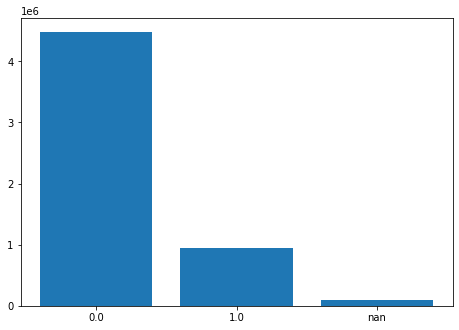

In [ ]:
'''
dist = pd.DataFrame()
data = train.D_143.value_counts().sort_index().to_pandas()
dist['value'] = [str(x) for x in data.index.values]
dist['freq'] = data.values

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = dist.value.values
students = dist.freq.values
ax.bar(langs,students)
plt.show()
'''

# Correlation of Variables


## Culstering Functions

In [ ]:
def perform_clustering(corr, clusters = None, limit = 0.8):
    if clusters is None:
        corr = 1 - abs(corr)
        clusters = list(map(lambda x: [x], corr.columns))
    max_val = 1 - limit
    cl = []
    for i in range(len(clusters)-1):
        for j in range(i+1, len(clusters)):
            avg_dist = 0
            for el1 in clusters[i]:
                for el2 in clusters[j]:
                    avg_dist += corr[el1][el2]
            avg_dist /= len(clusters[i])*len(clusters[j])
            if avg_dist <= max_val:
                max_val = avg_dist
                cl = [i,j]
    if len(cl)>1:
        clusters[cl[0]] += clusters[cl[1]]
        del clusters[cl[1]]
        clusters = perform_clustering(corr, clusters, limit)

    return clusters
    
def elect_members(corr, clusters):
    members = []
    corr = 1 - abs(corr)
    for cl in clusters:
        min_v = 0
        element = cl[0]
        if len(cl)!=1:
            for el1 in cl:
                v = 0            
                for el2 in cl:
                    v+=corr[el1][el2]
                if v >= min_v:
                    min_v = v
                    element = el1
        members.append(element)
    return members

def plot_confusion_matrix(y_true, y_pred):
    plt.figure(figsize=(8, 8))
    cf_matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".2f")
    ax.set_title('PD Classification Confusion Matrix\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('\nActual Values ')
    ax.xaxis.set_ticklabels(['No Tornado', 'Tornado'])
    ax.yaxis.set_ticklabels(['No Tornado', 'Tornado'])
    plt.show()

## Find uncorrelated members

In [ ]:
members, pre_mem = members.copy(), []

while len(members) != len(pre_mem):

  start   = 0
  pre_mem = members.copy()
  members = []
  jump    = int(np.floor(len(pre_mem)/5))
  random.shuffle(pre_mem)

  for end in [jump, jump*2, jump*3, jump*4] + [len(pre_mem)]:

    print(f'From {start} to {end}.')

    corr_train = train[pre_mem[start:end]].corr()
    clusters   = perform_clustering(corr_train, limit = 0.8)
    members    += elect_members(corr_train, clusters)
  
    start = end
  
  print(f'New size: {len(members)}. Old size: {len(pre_mem)}')
  del corr_train

  

In [ ]:
corr_train = train[pre_mem[start:end]].corr()
clusters   = perform_clustering(corr_train, limit = 0.8)
members    += elect_members(corr_train, clusters)

plt.figure(figsize=(20,10))
corr_num = train[members].corr()
sns.heatmap(corr_num)


## find categorial uncorrelated members

In [ ]:
'''
members_cat = []
corr_train  = train[cat_features].corr()
clusters    = perform_clustering(corr_train, limit = 0.8)
members_cat += elect_members(corr_train, clusters)
  
print(f'New size: {len(members_cat)}. Old size: {len(cat_features)}')
'''


In [ ]:
'''
plt.figure(figsize=(20,10))
corr_cat = train[members_cat].corr()
sns.heatmap(corr_cat)
'''

In [ ]:
'''
corr_cat.min().min()
'''

In [ ]:
'''
corr_cat.applymap(lambda x: 0.8 < x < 0.99).sum().sum()
'''

# Short - Long Customer

# Find binary variables

## frist found 

In [ ]:
bin_alge_train = []
bin_alge_test  = []

for feature in train.columns:

  if len(train[feature].unique()) == 2:

    bin_alge_train.append(feature)
  
  if len(test[feature].unique()) == 2:

    bin_alge_test.append(feature)

In [ ]:
list(zip(bin_alge_train, bin_alge_test))

[('R_2', 'R_2'),
 ('S_6', 'S_6'),
 ('R_4', 'R_4'),
 ('R_15', 'D_66'),
 ('S_18', 'R_15'),
 ('D_86', 'S_18'),
 ('D_87', 'D_87'),
 ('B_31', 'B_31'),
 ('R_19', 'R_19'),
 ('B_32', 'B_32'),
 ('S_20', 'S_20'),
 ('R_21', 'R_21'),
 ('R_22', 'R_22'),
 ('R_23', 'R_23'),
 ('D_93', 'D_93'),
 ('D_94', 'D_94'),
 ('R_24', 'R_24'),
 ('R_25', 'R_25'),
 ('D_96', 'D_96'),
 ('D_127', 'D_127'),
 ('R_28', 'R_28')]

In [ ]:
train[bin_alge_train].isna().sum()

R_2            0
S_6            0
R_4            0
R_15           0
S_18           0
D_86           0
D_87     5527586
B_31           0
R_19           0
B_32           0
S_20           0
R_21           0
R_22           0
R_23           0
D_93           0
D_94           0
R_24           0
R_25           0
D_96           0
D_127          0
R_28           0
dtype: int64

In [ ]:
test[bin_alge_train].isna().sum()

R_2             0
S_6             0
R_4             0
R_15            0
S_18            0
D_86         1067
D_87     11352790
B_31            0
R_19            0
B_32            0
S_20            0
R_21            0
R_22            0
R_23            0
D_93            0
D_94            0
R_24            0
R_25            0
D_96            0
D_127           0
R_28            0
dtype: int64

In [ ]:
train.D_87.value_counts(dropna=False)

NaN    5527586
1.0       3865
Name: D_87, dtype: int64

In [ ]:
targets.loc[train.loc[train.D_87 == 1].customer_ID.values].mean()

target    0.867012
dtype: float64

In [ ]:
train.loc[train.D_87.isna(), 'D_87'] = 0
test.loc[test.D_87.isna(), 'D_87'] = 0

In [ ]:
train.D_87.value_counts(dropna=False)

0.0    5527586
1.0       3865
Name: D_87, dtype: int64

In [ ]:
trin_alge_train = []
trin_alge_test  = []

for feature in train.columns:

  if len(train[feature].unique()) == 3:

    trin_alge_train.append(feature)
  
  if len(test[feature].unique()) == 3:

    trin_alge_test.append(feature)

list(zip(trin_alge_train, trin_alge_test))

[('D_66', 'D_86'),
 ('B_33', 'B_33'),
 ('D_92', 'D_92'),
 ('D_103', 'D_103'),
 ('R_27', 'R_27'),
 ('D_109', 'D_109'),
 ('D_114', 'D_114'),
 ('D_116', 'D_116'),
 ('D_120', 'D_120'),
 ('D_129', 'D_129'),
 ('D_135', 'D_135'),
 ('D_137', 'D_137'),
 ('D_139', 'D_139'),
 ('D_140', 'D_140'),
 ('D_143', 'D_143')]

In [ ]:
train[trin_alge_train].isna().sum() #D_66.value_counts(dropna=False)

D_66     0
B_33     0
D_92     0
D_103    0
R_27     0
D_109    0
D_114    0
D_116    0
D_120    0
D_129    0
D_135    0
D_137    0
D_139    0
D_140    0
D_143    0
dtype: int64

In [ ]:
test[trin_alge_train].isna().sum()

D_66     0
B_33     0
D_92     0
D_103    0
R_27     0
D_109    0
D_114    0
D_116    0
D_120    0
D_129    0
D_135    0
D_137    0
D_139    0
D_140    0
D_143    0
dtype: int64

In [ ]:
featu = 'D_143'

In [ ]:
train[featu].value_counts(dropna=False)

0.0    4486175
1.0     943728
NaN     101548
Name: D_143, dtype: int64

In [ ]:
targets.loc[train.loc[train[featu]==0].customer_ID.values].mean()

target    0.221816
dtype: float64

In [ ]:
targets.loc[train.loc[train[featu]==1].customer_ID.values].mean()

target    0.367104
dtype: float64

In [ ]:
targets.loc[train.loc[train[featu].isna()].customer_ID.values].mean()

target    0.357624
dtype: float64

In [ ]:
train.loc[train[featu].isna(), featu] = 2
test.loc[test[featu].isna(), featu] = 2

In [ ]:
bin_alge_train + trin_alge_train

['R_2',
 'S_6',
 'R_4',
 'R_15',
 'S_18',
 'D_86',
 'D_87',
 'B_31',
 'R_19',
 'B_32',
 'S_20',
 'R_21',
 'R_22',
 'R_23',
 'D_93',
 'D_94',
 'R_24',
 'R_25',
 'D_96',
 'D_127',
 'R_28',
 'D_66',
 'B_33',
 'D_92',
 'D_103',
 'R_27',
 'D_109',
 'D_114',
 'D_116',
 'D_120',
 'D_129',
 'D_135',
 'D_137',
 'D_139',
 'D_140',
 'D_143']

In [ ]:
cat_features

['B_30',
 'B_38',
 'D_114',
 'D_116',
 'D_117',
 'D_120',
 'D_126',
 'D_63',
 'D_64',
 'D_66',
 'D_68']

In [ ]:
train[cat_features].isna().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_66     0
D_68     0
dtype: int64

In [ ]:
test[cat_features].isna().sum()

B_30     0
B_38     0
D_114    0
D_116    0
D_117    0
D_120    0
D_126    0
D_63     0
D_64     0
D_66     0
D_68     0
dtype: int64

In [ ]:
featu = 'D_68'
train[featu].value_counts(dropna=False)

6.0    2782455
5.0    1201706
3.0     484442
4.0     477187
2.0     220111
7.0     216503
1.0     133122
0.0      15925
Name: D_68, dtype: int64

In [ ]:
train.loc[train[featu].isna(), featu] = 7
test.loc[test[featu].isna(), featu] = 7

In [ ]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68', 'R_2', 'S_6', 'R_4', 'R_15', 'S_18', 'D_86', 'D_87', 'B_31', 'R_19', 'B_32', 'S_20', 'R_21', 'R_22', 'R_23', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'D_127', 'R_28', 'D_66', 'B_33', 'D_92', 'D_103', 'R_27', 'D_109', 'D_114', 'D_116', 'D_120', 'D_129', 'D_135', 'D_137', 'D_139', 'D_140', 'D_143']

In [ ]:
for feature in cat_features:

  train[feature] = train[feature].astype('int8')
  test[feature]  = test[feature].astype('int8')

In [ ]:
train.to_parquet(train_dir)
test.to_parquet(test_dir)

## second found 

In [ ]:
new_cat = ['B_8', 'D_51', 'D_54', 'D_65', 'B_16', 'B_22', 'D_72', 'R_7', 'D_78', 'D_79', 'R_9', 'D_82', 'R_12', 'R_14', 'D_107', 'D_112', 'D_122', 'D_125']

D_131


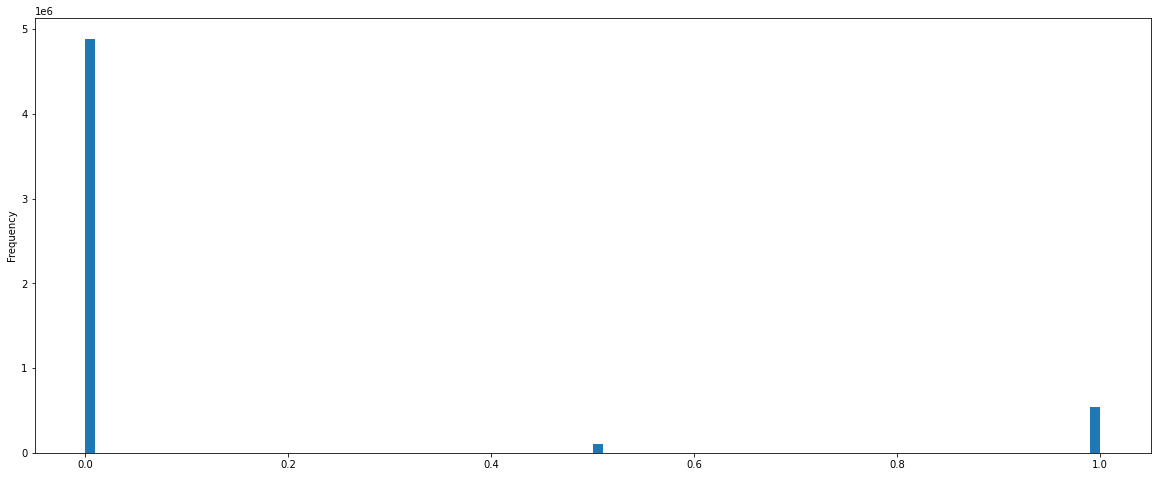

In [ ]:
fe = 18
cat = new_cat[fe]
print(cat)
train[cat].plot(kind='hist', bins=100, figsize=(20,8))
#plt.xticks(np.arange(0, 4, 0.1))
plt.show()


In [ ]:
cat = 'B_8'

In [ ]:
train[cat].value_counts(dropna=False)[8:]

7      98060
10     92733
9      92055
11     89689
12     88569
       ...  
142        1
144        1
176        1
135        1
174        1
Name: D_39, Length: 172, dtype: int64

In [ ]:
cat = 'D_39'

In [ ]:
print(targets.loc[train.loc[train[cat] == 0, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 1, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 2, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 3, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 4, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 5, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 6, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 7, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 8, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 9, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 10, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] == 11, 'customer_ID'].unique()].mean())
print(targets.loc[train.loc[train[cat] > 11, 'customer_ID'].unique()].mean())
#print(targets.loc[train.loc[train[cat].isna(), 'customer_ID'].unique()].mean())

target    0.253198
dtype: float64
target    0.366004
dtype: float64
target    0.271659
dtype: float64
target    0.268344
dtype: float64
target    0.27095
dtype: float64
target    0.26844
dtype: float64
target    0.268429
dtype: float64
target    0.270524
dtype: float64
target    0.272638
dtype: float64
target    0.272629
dtype: float64
target    0.273097
dtype: float64
target    0.274227
dtype: float64
target    0.336145
dtype: float64


In [ ]:
#train.loc[train[cat] == 2, cat] = -1
train.loc[train[cat].isna(), cat] = 2
#train.loc[train[cat] > 0, cat] = 1


#test.loc[test[cat] ==2, cat] = -1
test.loc[test[cat].isna(), cat] = 2
#test.loc[test[cat] > 0, cat] = 1

R_14


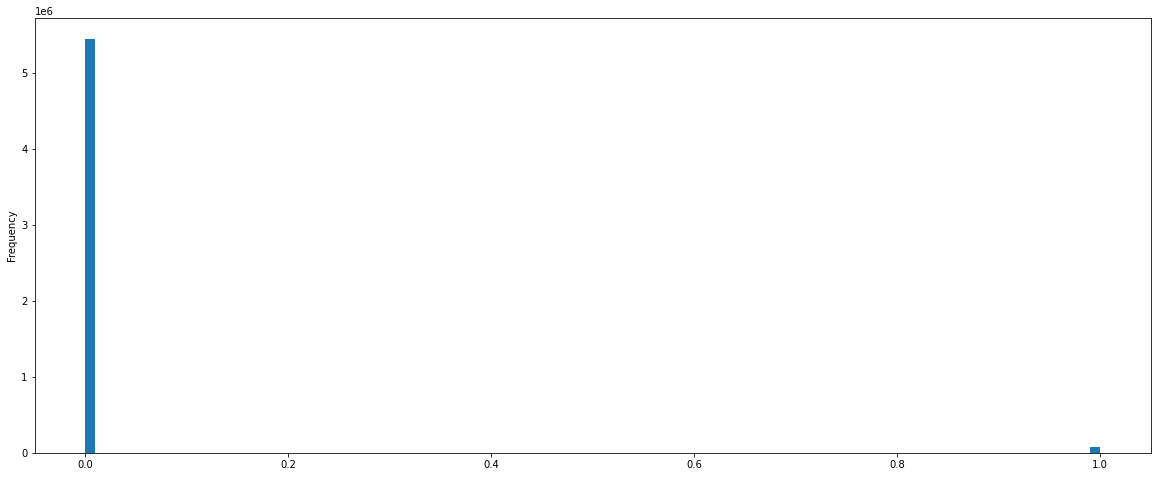

In [ ]:
print(cat)
train[cat].plot(kind='hist', bins=100, figsize=(20,8))
#plt.xticks(np.arange(0, 4, 0.1))
plt.show()

In [ ]:
print(train[cat].dtype)
print(test[cat].dtype)

float32
float32


In [ ]:
train[cat] = train[cat].astype('int8')
test[cat]  = test[cat].astype('int8')

In [ ]:
train.to_parquet(train_dir)

In [ ]:
test.to_parquet(test_dir)

In [ ]:
gc.collect()

88